<a href="https://colab.research.google.com/github/heejjj/Sleeping_Project/blob/main/weekday_weekend_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feb_26

In [1]:
#@title
# Min-Max 없이


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#@title
# 2/26일 데이터에 대한 one-step prediction
Feb_26 = pd.read_csv('/content/drive/MyDrive/KDT_python/project/Hackathon/data_edit/Feb_26.csv')
Feb_26 = Feb_26.drop('Unnamed: 0', axis=1)

# datetime으로 데이터 타입 변경
Feb_26['Start'] = pd.to_datetime(Feb_26['Start'], format='%Y-%m-%d %H:%M:%S', errors='raise')
Feb_26['End'] = pd.to_datetime(Feb_26['End'], format='%Y-%m-%d %H:%M:%S', errors='raise')
Feb_26.info()

In [ ]:
Feb_26

In [5]:
# 30초 간격으로 데이터를 보기로 했으므로 30초씩 증가시키는 시간 리스트 만듦.
import datetime

# 2/26일 데이터의 시작과 끝 시간으로 "Duration (hr)" 열보다 정확한 duration을 만든다.
start = Feb_26.iloc[0,0]
end = Feb_26.iloc[-1,1]

duration = end - start   # Timedelta('0 days 09:23:30')

k = duration.seconds // 30   # 30초 간격의 시간 몇 개로 만들어야 하는지. 33810초 / 30초 몫.

# 30초씩 증가시켜서 시간 리스트 만들기.
minute_list = [start]
for i in range(k):
  later = start + datetime.timedelta(seconds=30)
  minute_list.append(later)
  start = later

minute_list[:10]

[Timestamp('2023-02-26 00:00:40'),
 Timestamp('2023-02-26 00:01:10'),
 Timestamp('2023-02-26 00:01:40'),
 Timestamp('2023-02-26 00:02:10'),
 Timestamp('2023-02-26 00:02:40'),
 Timestamp('2023-02-26 00:03:10'),
 Timestamp('2023-02-26 00:03:40'),
 Timestamp('2023-02-26 00:04:10'),
 Timestamp('2023-02-26 00:04:40'),
 Timestamp('2023-02-26 00:05:10')]

In [6]:
# 0으로 채워진 df 만들기
myArr = np.zeros(len(minute_list))
target = pd.DataFrame(columns = minute_list)
target.loc[0]= myArr
target

,2023-02-26 00:00:40,2023-02-26 00:01:10,2023-02-26 00:01:40,2023-02-26 00:02:10,2023-02-26 00:02:40,2023-02-26 00:03:10,2023-02-26 00:03:40,2023-02-26 00:04:10,2023-02-26 00:04:40,2023-02-26 00:05:10,...,2023-02-26 09:19:40,2023-02-26 09:20:10,2023-02-26 09:20:40,2023-02-26 09:21:10,2023-02-26 09:21:40,2023-02-26 09:22:10,2023-02-26 09:22:40,2023-02-26 09:23:10,2023-02-26 09:23:40,2023-02-26 09:24:10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# duration 열 추가.
Feb_26["duration"] = Feb_26["End"] - Feb_26['Start']
Feb_26

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,duration
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:00
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:06:00
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:30
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:30
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:19:30
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:17:00
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:00
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:34:30
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:09:30
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:18:30


In [9]:
# one-hot encondin을 위해 0으로 채워진 열 추가.
Feb_26[minute_list] = 0
Feb_26

<ipython-input-9-66a5e67f2e0a>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Feb_26[minute_list] = 0
<ipython-input-9-66a5e67f2e0a>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Feb_26[minute_list] = 0
<ipython-input-9-66a5e67f2e0a>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Feb_26[minute

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,duration,2023-02-26 00:00:40,2023-02-26 00:01:10,...,2023-02-26 09:19:40,2023-02-26 09:20:10,2023-02-26 09:20:40,2023-02-26 09:21:10,2023-02-26 09:21:40,2023-02-26 09:22:10,2023-02-26 09:22:40,2023-02-26 09:23:10,2023-02-26 09:23:40,2023-02-26 09:24:10
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:06:00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:30,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:30,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:19:30,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:17:00,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:00,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:34:30,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:09:30,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:18:30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# one-hot encoding
a = 8
for i in range(Feb_26.shape[0]):
  b = Feb_26.loc[i,'duration'].seconds//30
  Feb_26.iloc[i,a:a+b] = 1
  a += b

In [11]:
Feb_26

,Start,End,Duration (hr),Value,Source,year_month_day,weekday,duration,2023-02-26 00:00:40,2023-02-26 00:01:10,...,2023-02-26 09:19:40,2023-02-26 09:20:10,2023-02-26 09:20:40,2023-02-26 09:21:10,2023-02-26 09:21:40,2023-02-26 09:22:10,2023-02-26 09:22:40,2023-02-26 09:23:10,2023-02-26 09:23:40,2023-02-26 09:24:10
0,2023-02-26 00:00:40,2023-02-26 00:03:40,0.050,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:00,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2023-02-26 00:03:40,2023-02-26 00:09:40,0.100,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:06:00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2023-02-26 00:09:40,2023-02-26 00:13:10,0.058,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:03:30,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2023-02-26 00:13:10,2023-02-26 00:14:40,0.025,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:30,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023-02-26 00:14:40,2023-02-26 00:34:10,0.325,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:19:30,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2023-02-26 00:34:10,2023-02-26 00:51:10,0.283,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:17:00,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2023-02-26 00:51:10,2023-02-26 00:52:10,0.017,4,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:01:00,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2023-02-26 00:52:10,2023-02-26 01:26:40,0.575,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:34:30,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2023-02-26 01:26:40,2023-02-26 01:36:10,0.158,1,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:09:30,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2023-02-26 01:36:10,2023-02-26 01:54:40,0.308,2,Sujeong의 Apple Watch,2023-02-26,6,0 days 00:18:30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 0으로 채워진 df 만들기
myArr = np.zeros(len(minute_list))
target = pd.DataFrame(columns = minute_list)
target.loc[0]= myArr
target

,2023-02-26 00:00:40,2023-02-26 00:01:10,2023-02-26 00:01:40,2023-02-26 00:02:10,2023-02-26 00:02:40,2023-02-26 00:03:10,2023-02-26 00:03:40,2023-02-26 00:04:10,2023-02-26 00:04:40,2023-02-26 00:05:10,...,2023-02-26 09:19:40,2023-02-26 09:20:10,2023-02-26 09:20:40,2023-02-26 09:21:10,2023-02-26 09:21:40,2023-02-26 09:22:10,2023-02-26 09:22:40,2023-02-26 09:23:10,2023-02-26 09:23:40,2023-02-26 09:24:10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# 0인 값을 해당하는 "Value"값 (= 수면 단계 값) 으로 채워준다.

a = 0
for i in range(len(minute_list)):
  for j in range(Feb_26.shape[0]):
    b = Feb_26.loc[j,'duration'].seconds//30
    target.iloc[0,a:a+b] = Feb_26.loc[j, 'Value']
    a += b

In [14]:
data = target.T
data

,0
2023-02-26 00:00:40,2.0
2023-02-26 00:01:10,2.0
2023-02-26 00:01:40,2.0
2023-02-26 00:02:10,2.0
2023-02-26 00:02:40,2.0
...,...
2023-02-26 09:22:10,2.0
2023-02-26 09:22:40,2.0
2023-02-26 09:23:10,2.0
2023-02-26 09:23:40,2.0


In [15]:
# one-step pred
# 크기가 N인 시계열 데이터를 N - seq_length 개의 지도학습용 데이터로 변환
# 지도학습용 데이터 구축하기

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 180
X, y = create_sequences(data, seq_length)

In [16]:
X.shape, y.shape

((948, 180, 1), (948, 1))

In [17]:
# 학습 : 검증 : 시험 =  8:1:1 
train_size = int(X.shape[0] * 0.8)
test_size = int(X.shape[0] * 0.1)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+test_size], y[train_size:train_size+test_size]
X_test, y_test = X[train_size+test_size:], y[train_size+test_size:]

MIN = X_train.min()
MAX = X_train.max()

In [18]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(758, 180, 1) (94, 180, 1) (96, 180, 1)
(758, 1) (94, 1) (96, 1)


In [19]:
print(MIN, MAX)

1.0 4.0


In [21]:
# minute_list 열을 transpose하고(이 열을 행 인덱스로 만들어야 함.) Value 값을 뽑은 1열 데이터로 만들어야 함.

In [20]:
# PyTorch 모델에 입력되기 위해 np.array 데이터 타입를 torch.Tensor 타입으로 변환
import torch

def make_Tensor(array):
  return torch.from_numpy(array).float()

In [22]:
X_train = make_Tensor(X_train)
y_train = make_Tensor(y_train)
X_val = make_Tensor(X_val)
y_val = make_Tensor(y_val)
X_test = make_Tensor(X_test)
y_test = make_Tensor(y_test)

In [23]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

torch.Size([758, 180, 1]) torch.Size([94, 180, 1]) torch.Size([96, 180, 1])
torch.Size([758, 1]) torch.Size([94, 1]) torch.Size([96, 1])


In [24]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [25]:
# LSTM 모델 생성
class CovidPredictor(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(CovidPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
        )
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

In [26]:
# 학습
def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    for t in range(num_epochs):

        epoch_loss = 0

        for idx, seq in enumerate(train_data): 

            model.reset_hidden_state() # seq 별 hidden state reset

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # 1개의 step에 대한 loss

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()

        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:

            with torch.no_grad():

                val_loss = 0

                for val_idx, val_seq in enumerate(val_data):

                    model.reset_hidden_state() # seq 별로 hidden state 초기화 

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss
                
            val_hist.append(val_loss / len(val_data)) # val hist에 추가

            ## verbose 번째 마다 loss 출력 
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## patience 번째 마다 early stopping 여부 확인
            if (t % patience == 0) & (t != 0):
                
                ## loss가 커졌다면 early stop
                if val_hist[t - patience] < val_hist[t] :

                    print('\n Early Stopping')

                    break

        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')

            
    return model, train_hist, val_hist

In [27]:
model = CovidPredictor(
    n_features=1,
    n_hidden=4,
    seq_len=seq_length,
    n_layers=1
)
model, train_hist, val_hist = train_model(
    model,
    X_train,
    y_train,
    X_val,
    y_val,
    num_epochs=100,
    verbose=10,
    patience=50
)

Epoch 0 train loss: 0.7618405309390267 val loss: 0.4149301052093506
Epoch 10 train loss: 0.05183718937368066 val loss: 0.015917940065264702
Epoch 20 train loss: 0.05403404562957683 val loss: 0.027470218017697334
Epoch 30 train loss: 0.05559660136542408 val loss: 0.03563878685235977
Epoch 40 train loss: 0.053731161245884555 val loss: 0.04065024480223656
Epoch 50 train loss: 0.052413972512398675 val loss: 0.03276766091585159
Epoch 60 train loss: 0.05254691367413564 val loss: 0.03903839364647865
Epoch 70 train loss: 0.05123983602725107 val loss: 0.0304836668074131
Epoch 80 train loss: 0.050724639505698374 val loss: 0.0281327273696661
Epoch 90 train loss: 0.04885338903417059 val loss: 0.015762249007821083


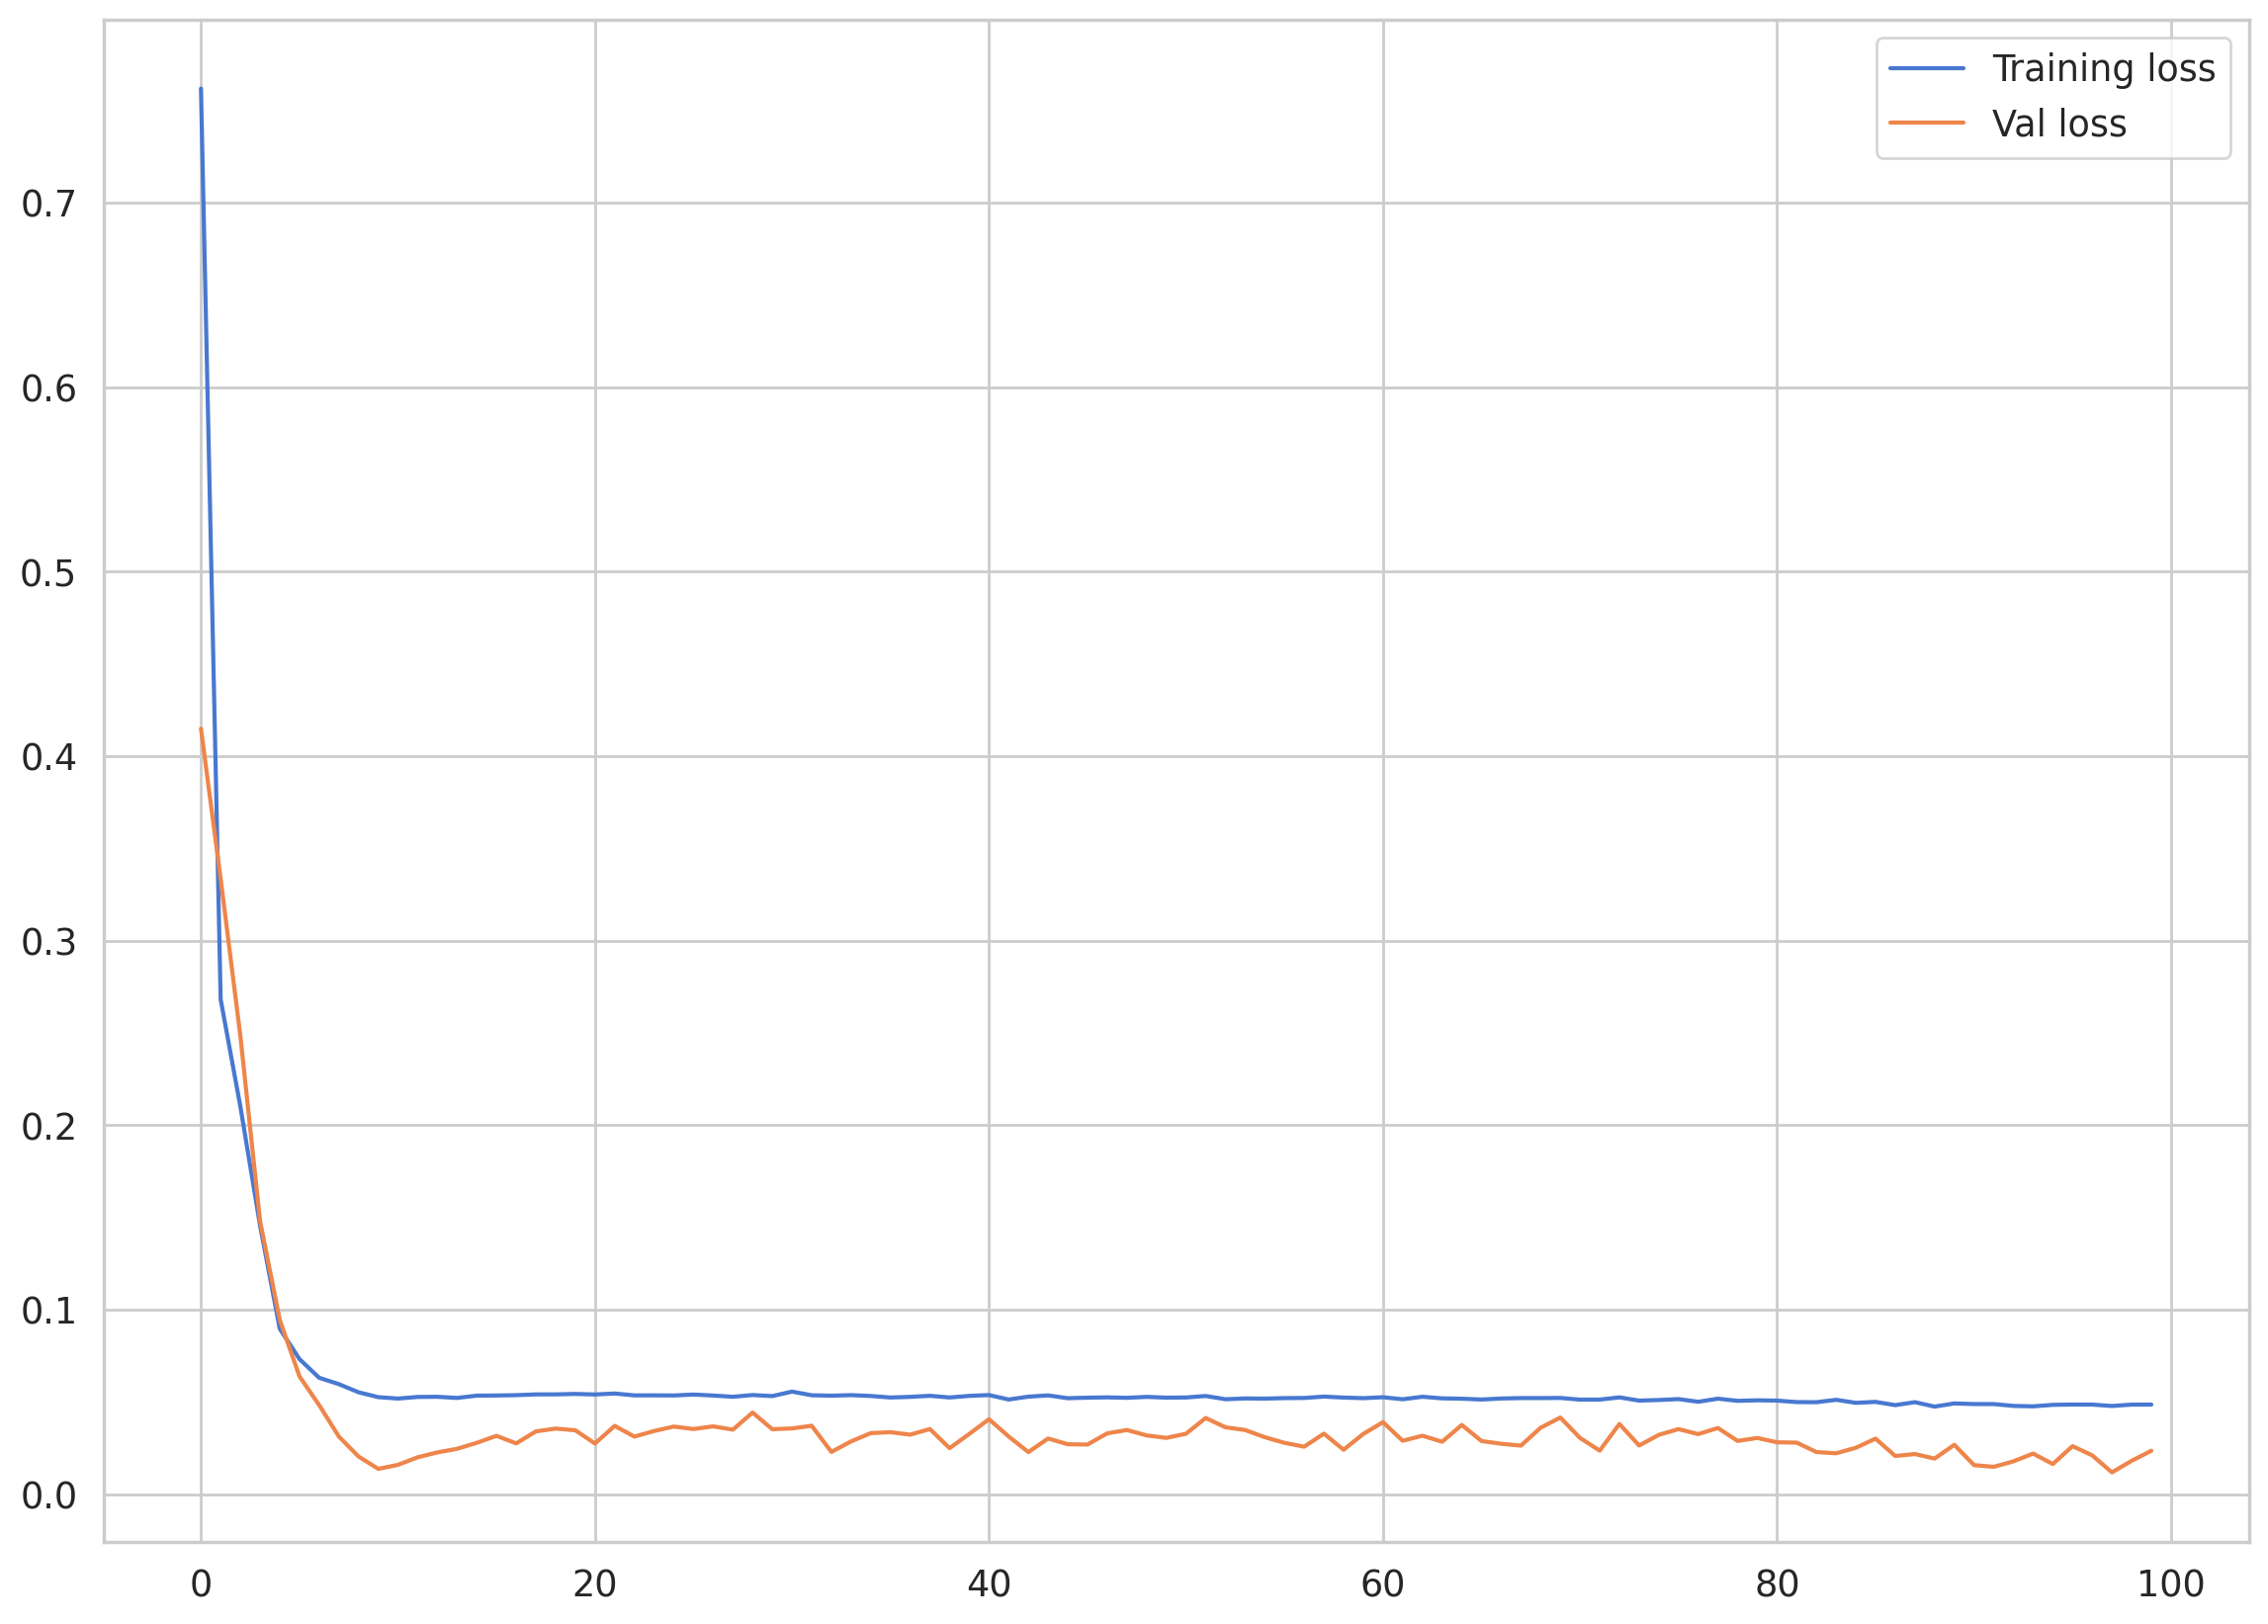

In [28]:
plt.plot(train_hist, label="Training loss")
plt.plot(val_hist, label="Val loss")
plt.legend()

# 예측

In [30]:
pred_dataset = X_test

with torch.no_grad():
    preds = []
    for _ in range(len(pred_dataset)):
        model.reset_hidden_state()
        y_test_pred = model(torch.unsqueeze(pred_dataset[_], 0))
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)

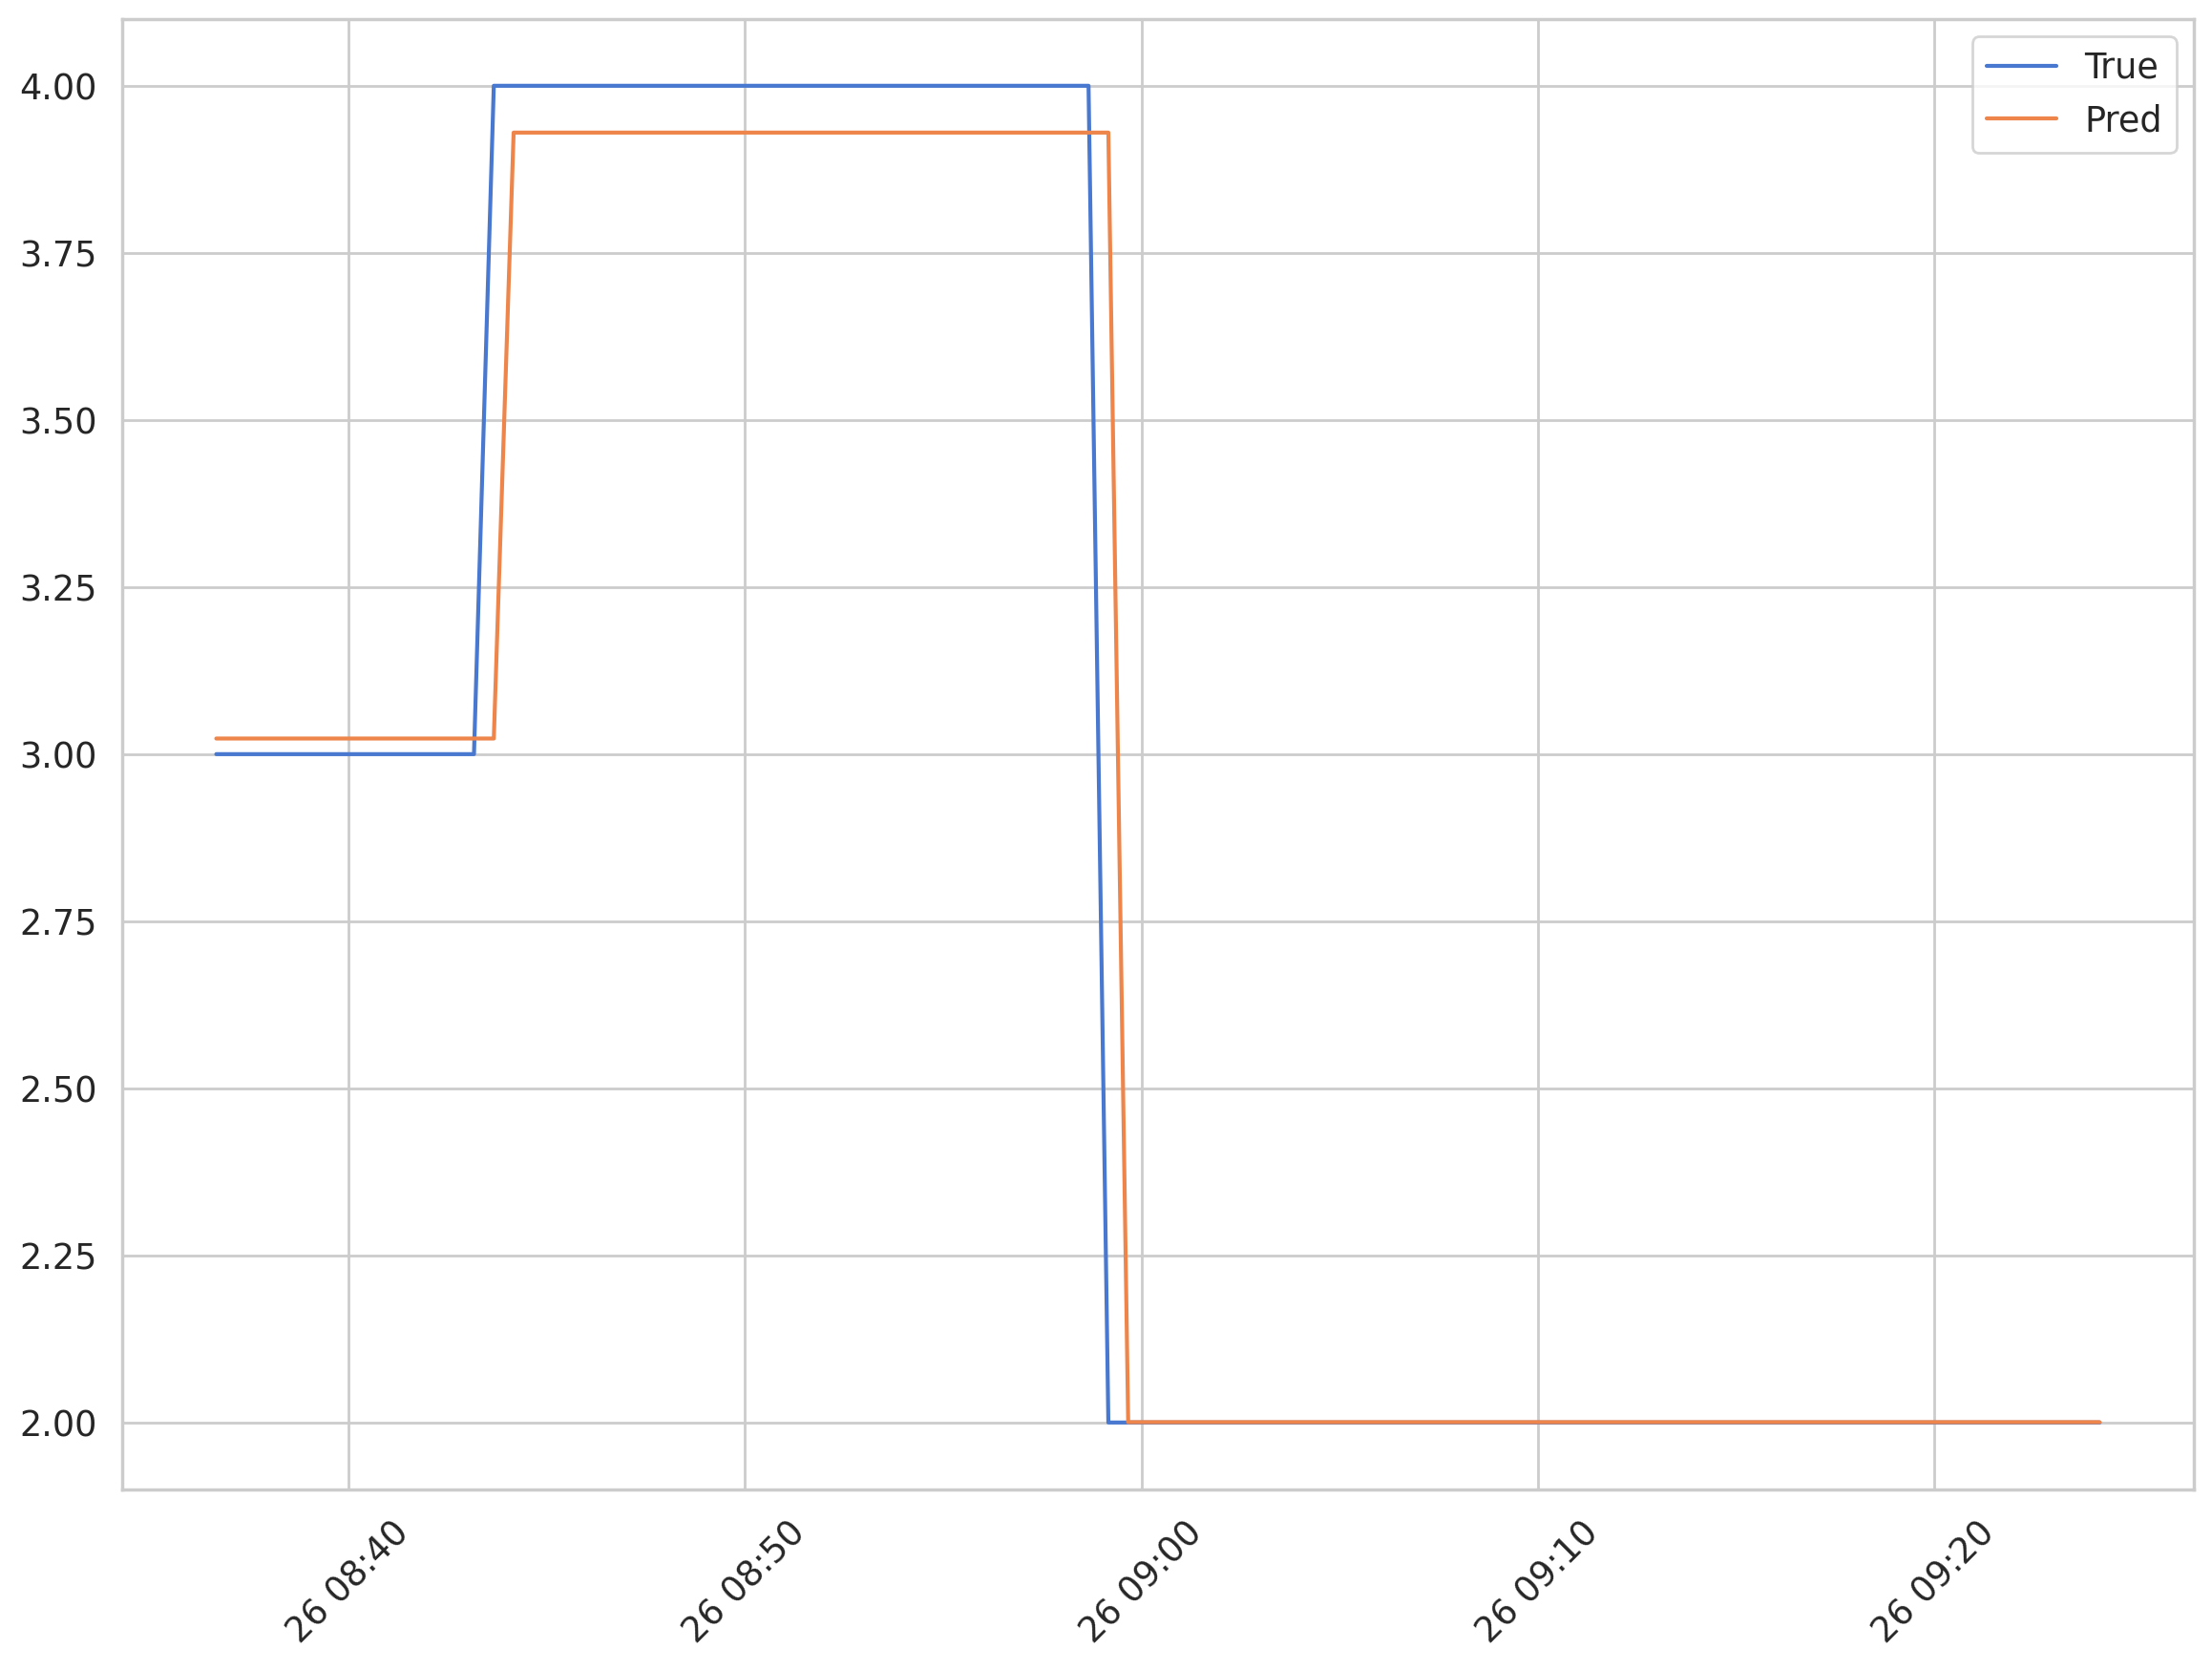

In [31]:
plt.plot(data.index[-len(y_test):], np.array(y_test), label='True')
plt.plot(data.index[-len(preds):], np.array(preds), label='Pred')
plt.xticks(rotation=45)
plt.legend()

In [32]:
def MAE(true, pred):
    return np.mean(np.abs(true-pred))

In [33]:
MAE(np.array(y_test), np.array(preds))

8.383268853028616

# weekend/weekday

In [36]:
## 해당 경로에 있는 .csv 파일명 리스트 가져오기

import os

path = '/content/drive/MyDrive/KDT_python/project/Hackathon/data_edit'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] ## 파일명 끝이 .csv인 경우

In [ ]:
file_list_py

In [38]:
cd /content/drive/MyDrive/KDT_python/project/Hackathon/data_edit

/content/drive/MyDrive/KDT_python/project/Hackathon/data_edit


In [130]:
# 폴더에 있는 파일 가져와서 데이터프레임으로 합치기
data_concat = pd.DataFrame()

for files in file_list_py:
    df= pd.read_csv(files)
    data_concat = pd.concat([data_concat, df])

In [ ]:
data_concat = data_concat.drop('Unnamed: 0', axis=1)
data_concat  

In [133]:
Mon = data_concat[data_concat["weekday"]==0]
Tue = data_concat[data_concat["weekday"]==1]
Wed = data_concat[data_concat["weekday"]==2]
Thur = data_concat[data_concat["weekday"]==3]
Fri = data_concat[data_concat["weekday"]==4]
Sat = data_concat[data_concat["weekday"]==5]
Sun = data_concat[data_concat["weekday"]==6]

In [175]:
# weekday - 주중 / weekend - 주말
weekday = pd.concat([Mon, Tue, Wed, Thur, Fri])
weekend = pd.concat([Sat, Sun])

In [176]:
# 날짜 순서대로 정렬
weekday = weekday.sort_values("Start")
weekend = weekend.sort_values("Start")

# 모델에 필요한 데이터 열만 선택
weekday = weekday.loc[:,["Start","Value"]]
weekend = weekend.loc[:,["Start","Value"]]

In [172]:
#@title
# LSTM 모델에 맞게 시간 정보를 인덱스로 지정
weekday = weekday.set_index(keys = 'Start')
weekend = weekend.set_index(keys = 'Start')   

# 제외

In [168]:
# 길이가 다른 일별 데이터에 대한 구분을 위해 일별 데이터 정보를 담은 index를 열로 변환함.
weekday = weekday.reset_index()
weekend = weekend.reset_index()

In [146]:
# 일자 별로 시작되는 행 번호 list를 담은 변수 생성.
weekday_daylist = weekday[weekday["index"]==0].index.values
weekend_daylist = weekend[weekend["index"]==0].index.values
print(weekday_daylist, weekend_daylist)

[   0   26   52   82  114  139  166  203  229  248  290  318  342  363
  409  437  451  478  499  528  550  600  622  653  681  707  734  769
  796  822  840  870  898  924  962  986 1017 1044 1075 1112 1143 1178
 1202 1227 1244 1282 1297] [  0  34  64  90 146 187 225 246 289 319 368 390 419 453 491 520 550]


In [147]:
# 일자 별로 길이를 계산하기 위해 마지막 행번호를 추가
weekday_last = weekday.shape[0] - 1
weekend_last = weekend.shape[0] - 1
weekday_daylist = np.append(weekday_daylist, np.array([weekday_last]))
weekend_daylist = np.append(weekend_daylist, np.array([weekend_last]))

print(weekday_daylist, weekend_daylist)

[   0   26   52   82  114  139  166  203  229  248  290  318  342  363
  409  437  451  478  499  528  550  600  622  653  681  707  734  769
  796  822  840  870  898  924  962  986 1017 1044 1075 1112 1143 1178
 1202 1227 1244 1282 1297 1317] [  0  34  64  90 146 187 225 246 289 319 368 390 419 453 491 520 550 574]


In [148]:
# 일자 별로 길이를 계산
weekday_list = []
for i in range(len(weekday_daylist)-1):
  weekday_list.append(weekday_daylist[i+1] - weekday_daylist[i])

weekend_list = []
for i in range(len(weekend_daylist)-1):
  weekend_list.append(weekend_daylist[i+1] - weekend_daylist[i])

In [153]:
weekday = weekday.loc[:,["Start", "Value"]]   # LSTM 모델을 돌리기 위해 필요한 열을 추출
weekday = weekday.set_index(keys = 'Start')   # LSTM 모델에 맞게 시간 정보를 인덱스로 지정
weekday

,Value
Start,
2023-02-26 23:36:12,2
2023-02-26 23:57:42,1
2023-02-27 00:31:12,2
2023-02-27 00:32:12,3
2023-02-27 00:39:12,4
...,...
2023-05-03 06:16:05,2
2023-05-03 06:44:05,3
2023-05-03 07:09:05,2


In [154]:
weekend = weekend.loc[:,["Start", "Value"]]   # LSTM 모델을 돌리기 위해 필요한 열을 추출
weekend = weekend.set_index(keys = 'Start')   # LSTM 모델에 맞게 시간 정보를 인덱스로 지정
weekend

,Value
Start,
2023-02-26 00:00:40,2
2023-02-26 00:03:40,4
2023-02-26 00:09:40,2
2023-02-26 00:13:10,4
2023-02-26 00:14:40,2
...,...
2023-04-30 07:09:14,2
2023-04-30 07:12:44,4
2023-04-30 07:15:44,2


In [157]:
# one-step pred
# 크기가 N인 시계열 데이터를 N - seq_length 개의 지도학습용 데이터로 변환
# 지도학습용 데이터 구축하기
xs = []
ys = []
k = 0
for day in weekday_list:
  seq_length = day
  x = weekday.iloc[k:(k+seq_length)]
  y = weekday.iloc[k+seq_length]
  xs.append(x)
  ys.append(y)
  k += seq_length

X = np.array(xs)
y = np.array(ys)

<ipython-input-157-154b096fe3f2>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(xs)


In [158]:
X.shape, y.shape   # X 데이터의 경우 seq_length가 달라서 shape가 제대로 표시되지 않음.

((47,), (47, 1))

# weekday

## train/val/test

In [181]:
# LSTM 모델에 input 데이터 형태를 맞춰줌
weekday = weekday.set_index(keys = 'Start')

? 데이터 split 어떻게 하죠...?

In [128]:
# 학습 : 검증 : 시험 =  8:1:1 
train_size = int(X.shape[0] * 0.8)
test_size = int(X.shape[0] * 0.1)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+test_size], y[train_size:train_size+test_size]
X_test, y_test = X[train_size+test_size:], y[train_size+test_size:]

MIN = X_train.min()
MAX = X_train.max()

In [129]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(37,) (4,) (6,)
(37, 1) (4, 1) (6, 1)


In [50]:
data1 = Mon.loc[:, ["Start",'Value']]
data1

,Start,Value
0,2023-02-26 23:36:12,2
1,2023-02-26 23:57:42,1
2,2023-02-27 00:31:12,2
3,2023-02-27 00:32:12,3
4,2023-02-27 00:39:12,4
...,...,...
33,2023-05-01 10:33:56,3
34,2023-05-01 10:46:56,4
35,2023-05-01 10:47:26,2
36,2023-05-01 10:50:56,3


In [53]:
data1.loc[0]

,Start,Value
0,2023-02-26 23:36:12,2
0,2023-03-05 23:29:05,2
0,2023-03-13 02:02:06,2
0,2023-03-20 00:40:05,2
0,2023-03-26 23:58:09,2
0,2023-04-02 23:44:17,2
0,2023-04-10 01:22:05,2
0,2023-04-17 00:26:37,2
0,2023-04-23 23:55:14,2
0,2023-05-01 00:38:56,2


In [54]:
data = data1.set_index(keys='Start')
data

,Value
Start,
2023-02-26 23:36:12,2
2023-02-26 23:57:42,1
2023-02-27 00:31:12,2
2023-02-27 00:32:12,3
2023-02-27 00:39:12,4
...,...
2023-05-01 10:33:56,3
2023-05-01 10:46:56,4
2023-05-01 10:47:26,2


In [55]:
# one-step pred
# 크기가 N인 시계열 데이터를 N - seq_length 개의 지도학습용 데이터로 변환
# 지도학습용 데이터 구축하기

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 25
X, y = create_sequences(data, seq_length)

In [56]:
X.shape, y.shape

((229, 25, 1), (229, 1))